![](https://image.shutterstock.com/image-vector/row-different-houses-along-street-260nw-515925814.jpg)


# We use house property dataset, and learn data cleaning and visualization.                

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
prop = pd.read_csv('../input/property/property data.csv')
print(prop.head(10))

           PID  ST_NUM     ST_NAME OWN_OCCUPIED NUM_BEDROOMS NUM_BATH SQ_FT
0  100001000.0   104.0      PUTNAM            Y            3        1  1000
1  100002000.0   197.0   LEXINGTON            N            3      1.5    --
2  100003000.0     NaN   LEXINGTON            N          NaN        1   850
3  100004000.0   201.0    BERKELEY           12            1      NaN   700
4          NaN   203.0    BERKELEY            Y            3        2  1600
5  100006000.0   207.0    BERKELEY            Y          NaN        1   800
6  100007000.0     NaN  WASHINGTON          NaN            2   HURLEY   950
7  100008000.0   213.0     TREMONT            Y            1        1   NaN
8  100009000.0   215.0     TREMONT            Y           na        2  1800


In [3]:
# select numeric columns
prop_numeric = prop.select_dtypes(include=[np.number])
numeric_cols = prop_numeric.columns.values
print(numeric_cols)

['PID' 'ST_NUM']


In [4]:
# select non numeric columns
prop_non_num = prop.select_dtypes(exclude=[np.number])
non_num_cols = prop_non_num.columns.values
print(non_num_cols)

['ST_NAME' 'OWN_OCCUPIED' 'NUM_BEDROOMS' 'NUM_BATH' 'SQ_FT']


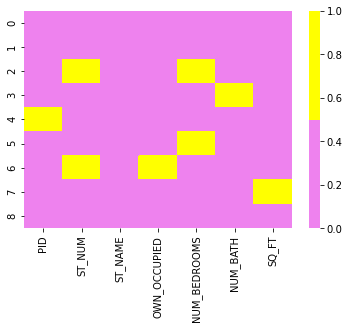

In [5]:
#Let's find the missing values in the data
cols = prop.columns[:10] # first 10 columns
colours = ['#EE82EE', '#ffff00'] # specify the colours - yellow is missing. violin is not missing.
sns.heatmap(prop[cols].isnull(), cmap=sns.color_palette(colours))

In [6]:
# % of missing.
for col in prop.columns:
    pct_missing = np.mean(prop[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

PID - 11.0%
ST_NUM - 22.0%
ST_NAME - 0.0%
OWN_OCCUPIED - 11.0%
NUM_BEDROOMS - 22.0%
NUM_BATH - 11.0%
SQ_FT - 11.0%


In [7]:
#ST_NUM and NUM_BEDROOM has more null values and we can't drop the entire column
#and we can't drop rows either, so we replace them

# categorical
prop['OWN_OCCUPIED'] = prop['OWN_OCCUPIED'].fillna('Y')
prop['NUM_BEDROOMS'] = prop['NUM_BEDROOMS'].fillna('2')
prop['NUM_BATH'] = prop['NUM_BATH'].fillna('1')
prop['SQ_FT'] = prop['SQ_FT'].fillna('800')



# numeric
prop['PID'] = prop['PID'].fillna(100005000.0)
prop['ST_NUM'] = prop['ST_NUM'].fillna(200.0)

In [8]:
#Now replace the values which are not null values

prop['NUM_BATH'] = prop['NUM_BATH'].replace('HURLEY','1')
prop['OWN_OCCUPIED'] = prop['OWN_OCCUPIED'].replace('12', 'N')
prop['NUM_BEDROOMS'] = prop['NUM_BEDROOMS'].replace('na', '2')
prop['SQ_FT'] = prop['SQ_FT'].replace('--', '800')
prop['ST_NAME'] = prop['ST_NAME'].replace('PUTNAM','WASHINGTON')

In [9]:
prop['OWN_OCCUPIED'] = prop['OWN_OCCUPIED'].replace('Y', '1')
prop['OWN_OCCUPIED'] = prop['OWN_OCCUPIED'].replace('N', '0')


In [10]:
prop.head(20)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,WASHINGTON,1,3,1,1000
1,100002000.0,197.0,LEXINGTON,0,3,1.5,800
2,100003000.0,200.0,LEXINGTON,0,2,1,850
3,100004000.0,201.0,BERKELEY,0,1,1,700
4,100005000.0,203.0,BERKELEY,1,3,2,1600
5,100006000.0,207.0,BERKELEY,1,2,1,800
6,100007000.0,200.0,WASHINGTON,1,2,1,950
7,100008000.0,213.0,TREMONT,1,1,1,800
8,100009000.0,215.0,TREMONT,1,2,2,1800


In [11]:
print(prop.dtypes)

PID             float64
ST_NUM          float64
ST_NAME          object
OWN_OCCUPIED     object
NUM_BEDROOMS     object
NUM_BATH         object
SQ_FT            object
dtype: object


In [12]:
#Change the datatypes of NUM_BEDROOMS, NUM_BATH, SQ_FT to float


prop['NUM_BATH'] = prop['NUM_BATH'].astype(float)
prop['NUM_BEDROOMS'] = prop['NUM_BEDROOMS'].astype(float)
prop['SQ_FT'] = prop['SQ_FT'].astype(float)

In [13]:
print(prop.dtypes)

PID             float64
ST_NUM          float64
ST_NAME          object
OWN_OCCUPIED     object
NUM_BEDROOMS    float64
NUM_BATH        float64
SQ_FT           float64
dtype: object


In [14]:
#Finally we have our clean data
#Lets check for missing values
for col in prop.columns:
    pct_missing = np.mean(prop[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

PID - 0.0%
ST_NUM - 0.0%
ST_NAME - 0.0%
OWN_OCCUPIED - 0.0%
NUM_BEDROOMS - 0.0%
NUM_BATH - 0.0%
SQ_FT - 0.0%


In [15]:
#We don't have any missing value or unnecessary data
prop

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,WASHINGTON,1,3.0,1.0,1000.0
1,100002000.0,197.0,LEXINGTON,0,3.0,1.5,800.0
2,100003000.0,200.0,LEXINGTON,0,2.0,1.0,850.0
3,100004000.0,201.0,BERKELEY,0,1.0,1.0,700.0
4,100005000.0,203.0,BERKELEY,1,3.0,2.0,1600.0
5,100006000.0,207.0,BERKELEY,1,2.0,1.0,800.0
6,100007000.0,200.0,WASHINGTON,1,2.0,1.0,950.0
7,100008000.0,213.0,TREMONT,1,1.0,1.0,800.0
8,100009000.0,215.0,TREMONT,1,2.0,2.0,1800.0


# Exploratory data analysis

*Key findings and Insights*
* Num of bathroom  and bedrooms

Text(0.5, 1.0, 'Num of bedroom and bathroom per sqft')

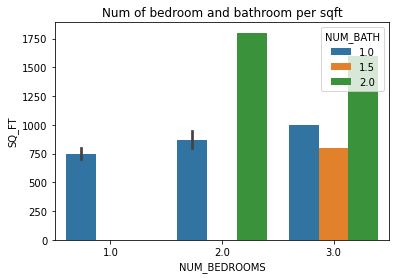

In [16]:
sns.barplot(x='NUM_BEDROOMS', y='SQ_FT', data=prop, hue='NUM_BATH')
plt.title('Num of bedroom and bathroom per sqft')

Those who have own occuption

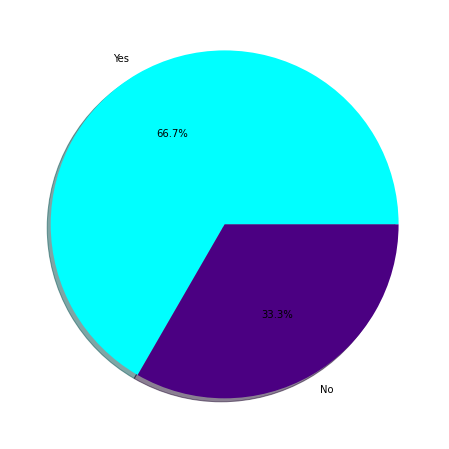

In [17]:
from matplotlib import pyplot as plt 
  
data = prop['OWN_OCCUPIED'].value_counts()
fig = plt.figure(figsize =(10, 8)) 
label = ['Yes', 'No']
colors = ( "cyan","indigo")
plt.pie(data,autopct='%1.1f%%', labels=label, shadow=True, colors=colors)
plt.show()

# Houses acc to street name

Text(0.5, 1.0, 'Street distribution.')

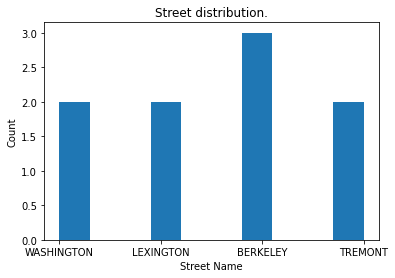

In [18]:
plt.hist(prop['ST_NAME'])
plt.xlabel('Street Name')
plt.ylabel('Count')
plt.title('Street distribution.')

# Finally wrap up

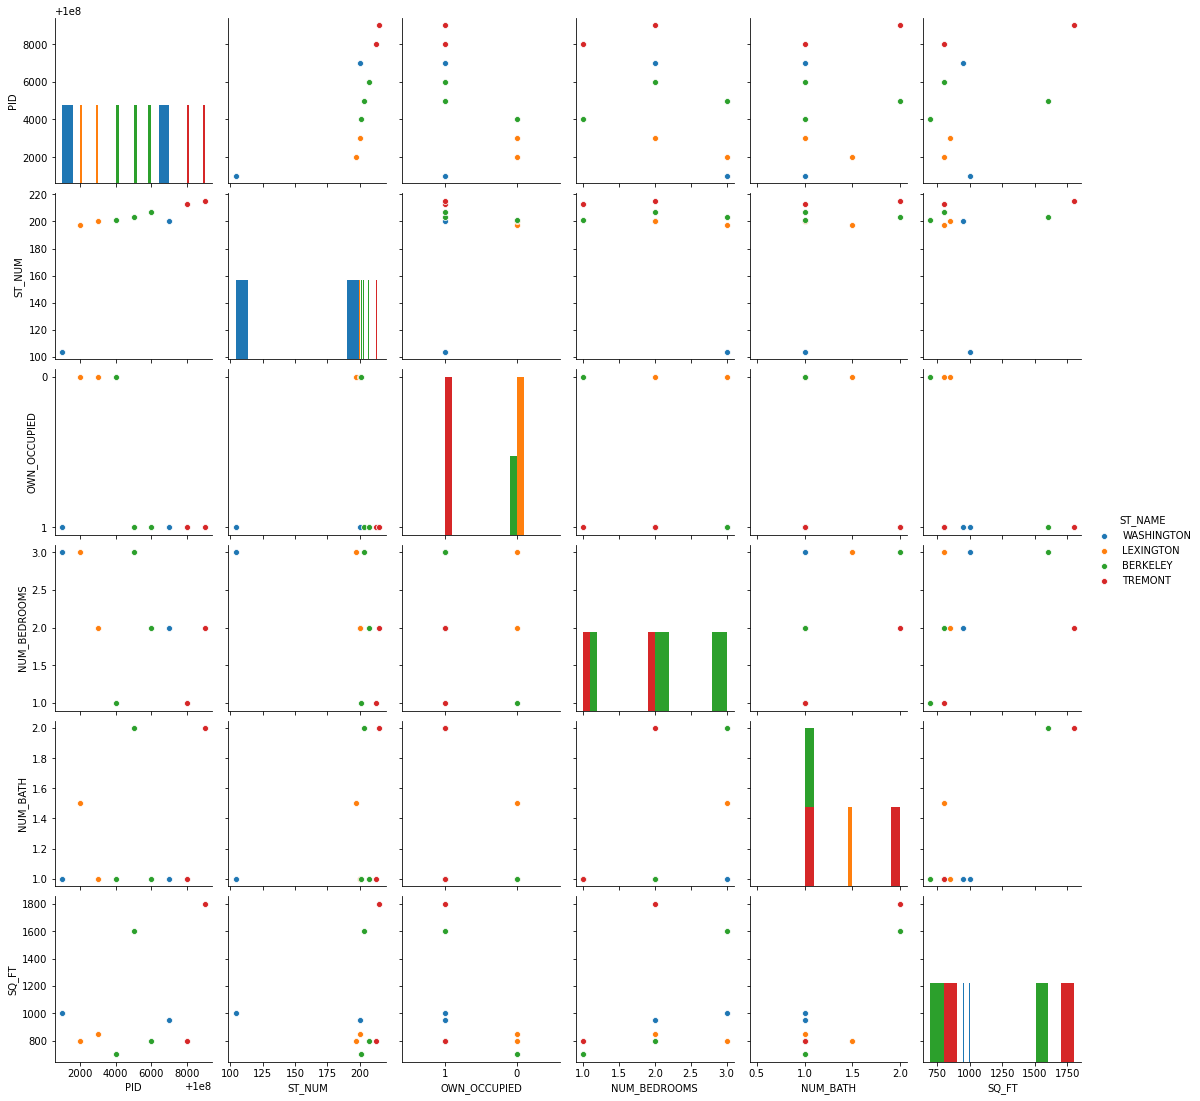

In [19]:
sns.pairplot(prop,diag_kind="hist", hue='ST_NAME')

# *That's all folks*